##### Selection
How to choose the best model for each dataset

In [93]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = [15,7]

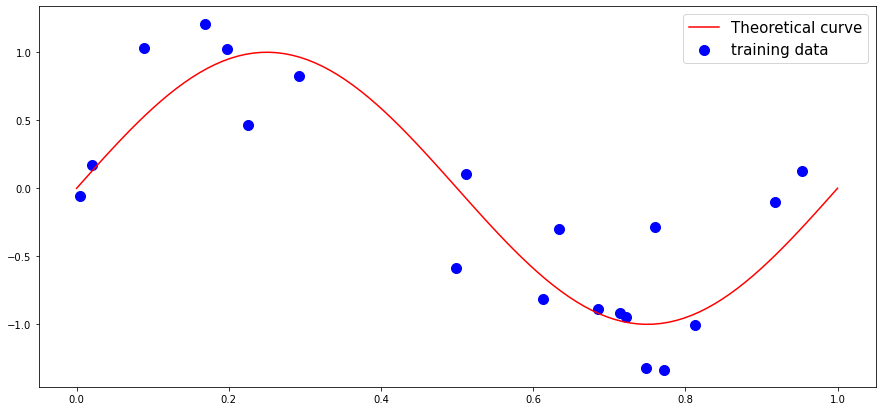

In [33]:
np.random.seed(10)

def function(x):
#     y = x
#     y = np.cos(2 * np.pi * x)
#     y = x**4 + x**9
    y = np.sin(2 * np.pi * x)
    return y

# training set
N_train = 20
sigma = 0.3
# x_train= np.linspace(0, 1,N_train)
x_train= np.random.uniform(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)


fig = plt.figure()
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")



# test set
N_test = 10
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

P valor até passa, mas relação com certeza não é linear olhando pelos resíduos


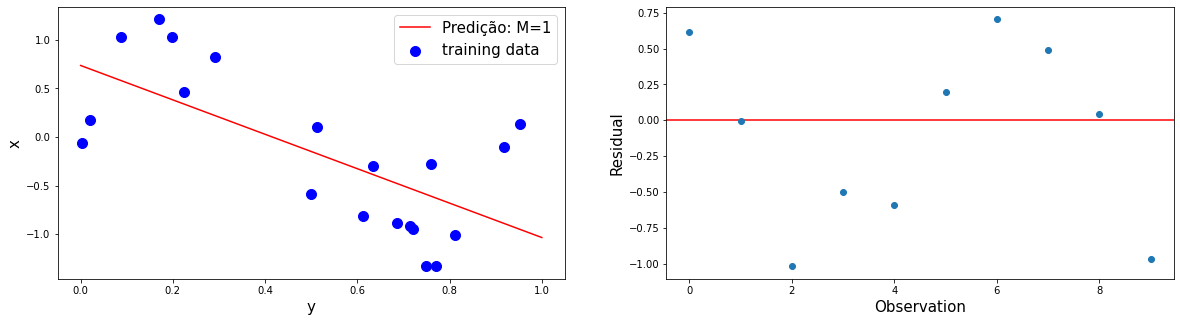

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     15.66
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           0.000925
Time:                        17:09:24   Log-Likelihood:                -17.121
No. Observations:                  20   AIC:                             38.24
Df Residuals:                      18   BIC:                             40.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7360      0.267      2.752      0.0

In [102]:
## regression model

## initialize module
model = linear_model.LinearRegression()

model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

print('P valor até passa, mas relação com certeza não é linear olhando pelos resíduos')

x_with_intercept = np.c_[np.ones(x_train.shape[0]), x_train]

# mostra os resultados
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")
plt.legend(fontsize=15)
plt.ylabel("x", fontsize=15)
plt.xlabel("y", fontsize=15)
# plt.show()

# residuals
y_predict = model.predict(x_test)
e = np.array(y_predict - y_test)
t = np.arange(0,len(e))

plt.subplot(1,2,2)
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("Residual", fontsize=15)
plt.xlabel("Observation", fontsize=15)

plt.show()

print(sm.OLS(y_train,x_with_intercept).fit().summary())

Let's try another model with a polinom with degree $M=3$.

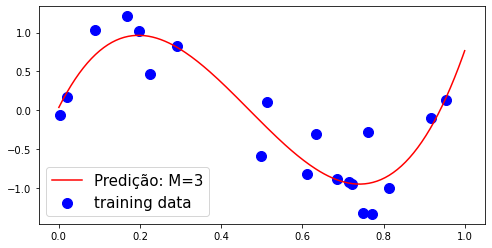

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     32.01
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           5.39e-07
Time:                        17:09:28   Log-Likelihood:                -3.9161
No. Observations:                  20   AIC:                             15.83
Df Residuals:                      16   BIC:                             19.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.234      0.163      0.8

In [103]:
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)
print(sm.OLS(y_train,X).fit().summary())

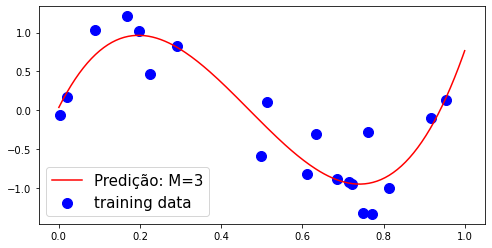

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     32.01
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           5.39e-07
Time:                        17:12:01   Log-Likelihood:                -3.9161
No. Observations:                  20   AIC:                             15.83
Df Residuals:                      16   BIC:                             19.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.234      0.163      0.8

In [112]:
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)
print(sm.OLS(y_train,X).fit().summary())

### Mean Squared Error MSE

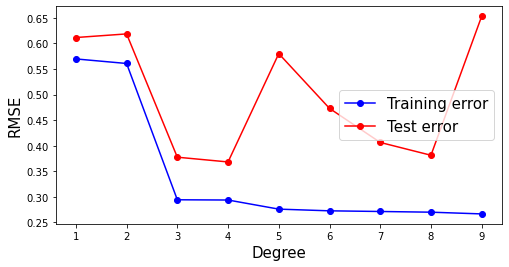

In [114]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

## More Data

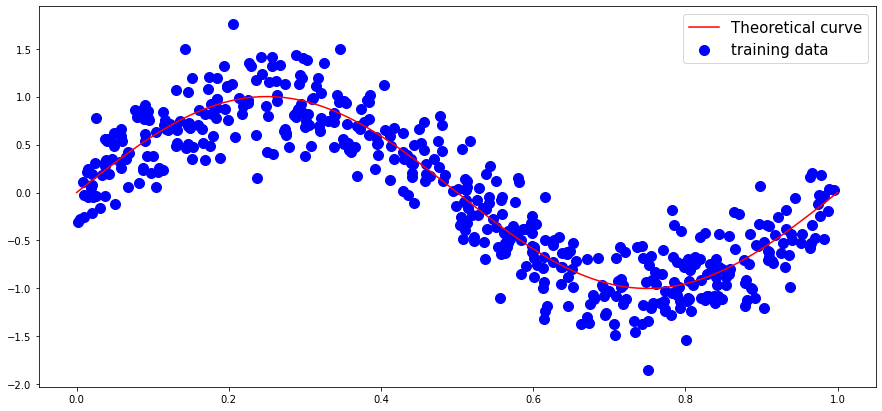

In [116]:
np.random.seed(10)

def function(x):
#     y = x
#     y = np.cos(2 * np.pi * x)
#     y = x**4 + x**9
    y = np.sin(2 * np.pi * x)
    return y

# training set
N_train = 500
sigma = 0.3
# x_train= np.linspace(0, 1,N_train)
x_train= np.random.uniform(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)


fig = plt.figure()
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")



# test set
N_test = 500
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

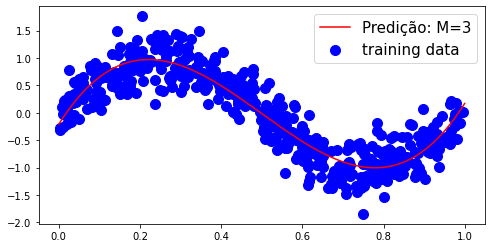

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     987.2
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.19e-208
Time:                        17:19:26   Log-Likelihood:                -82.400
No. Observations:                 500   AIC:                             172.8
Df Residuals:                     496   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2069      0.049     -4.205      0.0

array([  0.        ,  11.76064731, -34.12406461,  22.74032518])

In [125]:
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)
print(sm.OLS(y_train,X).fit().summary())
model.coef_

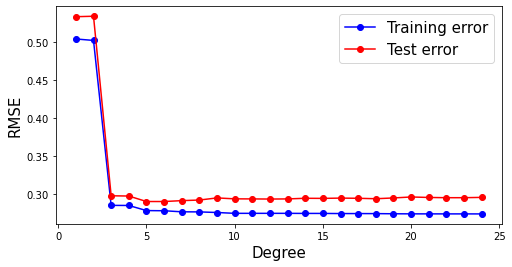

In [128]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,25):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)